In [64]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [65]:
normal = pd.read_excel('SWaT.A1 _ A2_Dec 2015\Physical\SWaT_Dataset_Normal_v1.xlsx')
# attacks = pd.read_excel('Physical\SWaT_Dataset_Attack_v0.xlsx')
normal.shape,  # attacks.shape 

c:\Users\Andrew23\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


((495001, 53),)

In [66]:
normal.columns = normal.iloc[0, :]
normal.drop(0, inplace=True)

In [67]:
normal.columns = normal.columns.str.replace(' ', '')
# normal.columns

In [68]:
normal = normal.drop(["Timestamp" , "Normal/Attack" ], axis=1)

In [69]:
normal.head(5)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
1,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,1,...,0,1,1,9.100231,0,3.3485,0.000256,1,1,1
2,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,1,...,0,1,1,9.100231,0,3.3485,0.000256,1,1,1
3,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,1,...,0,1,1,9.100231,0,3.3485,0.000256,1,1,1
4,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,1,...,0,1,1,9.100231,0,3.3485,0.000256,1,1,1
5,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,1,...,0,1,1,9.100231,0,3.3485,0.000256,1,1,1


In [70]:
(normal.isna().sum() != 0).sum()  # nice

0

In [71]:
normal = normal.astype(float)
# normal.dtypes

In [72]:
# scaler = StandardScaler()
# model = scaler.fit(normal)
# scaled_data = model.transform(normal)

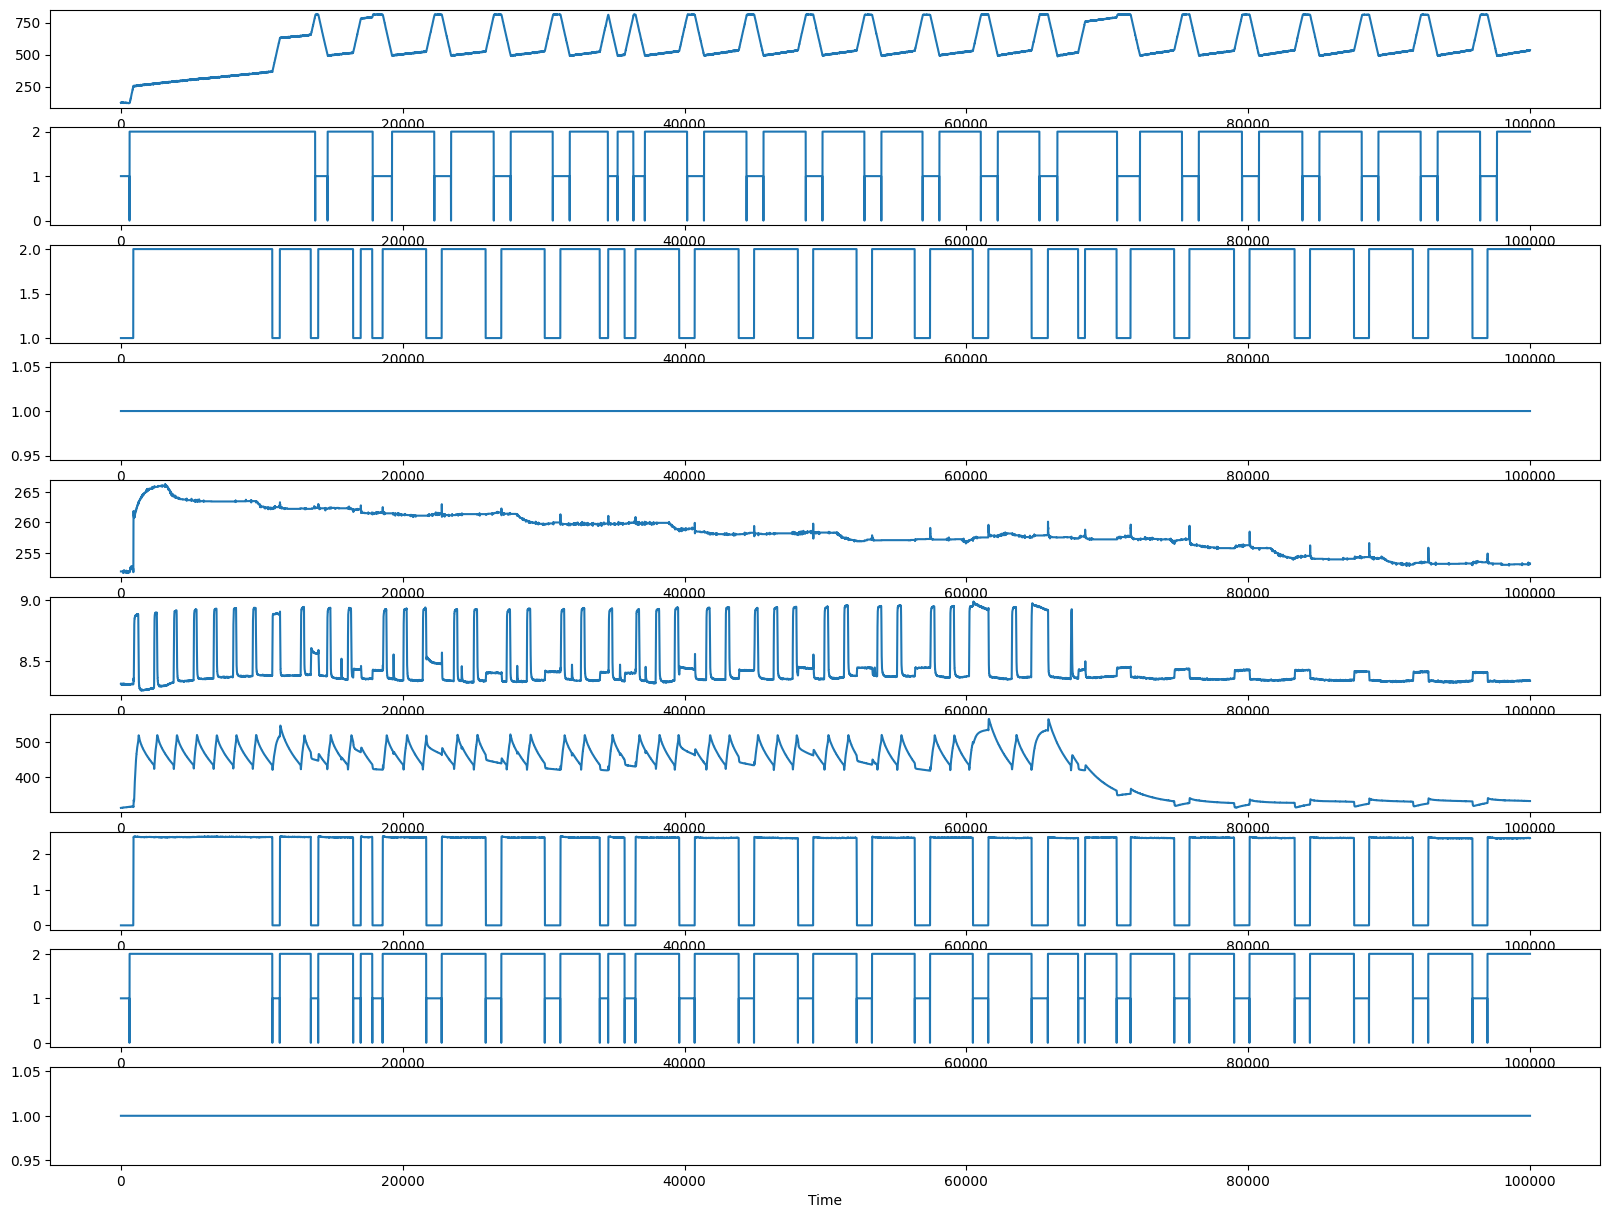

In [55]:
fig, axs = plt.subplots(10, 1, figsize=(20, 15))
ind_start, ind_end = 0, 100000
for i in range(10):
        axs[i].plot(range(ind_end - ind_start), normal.iloc[ind_start:ind_end, i+1], label=normal.columns[i+1])
        axs[i].set_xlabel('Time')

## Attacks

In [73]:
attacks = pd.read_excel('Physical\SWaT_Dataset_Attack_v0.xlsx')
attacks.shape

c:\Users\Andrew23\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(449920, 53)

In [74]:
attacks.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
4,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal


In [75]:
attacks.columns = attacks.iloc[0, :]
attacks.drop(0, inplace=True)
attacks.columns = attacks.columns.str.replace(' ', '')

In [76]:
labels = [float(label!= 'Normal') for label in attacks["Normal/Attack"].values]
sum(labels)
# attacka.drop(["Timestamp" , "Normal/Attack" ], inplace=Ture)

54621.0

In [77]:
# attacks.shape
attacks.iloc[0, :]['Timestamp']

' 28/12/2015 10:00:00 AM'

In [78]:
anomaly_feature = ['MV304', 'MV303', 'LIT301', 'MV303', 'AIT504', 'AIT504', 'MV101', 'LIT101', 'UV401', 'AIT502', 'P501']   # NOT ALL ALL OF THEM!!!
# anomaly_time_start = [np.array('2015-12-28T10:29:14', dtype=np.datetime64),
#                       np.array('2015-12-29T11:11:25', dtype=np.datetime64),
#                       np.array('2015-12-29T11:35:40', dtype=np.datetime64),
#                       np.array('2015-12-29T11:57:25', dtype=np.datetime64),
#                       np.array('2015-12-29T14:38:12', dtype=np.datetime64),
#                       np.array('2015-12-29T18:10:43', dtype=np.datetime64),
#                       np.array('2015-12-29T18:15:43', dtype=np.datetime64),
#                       np.array('2015-12-29T18:30:00', dtype=np.datetime64),
#                       np.array('2015-12-29T22:55:18', dtype=np.datetime64),
#                       ]
# anomaly_time_end = [np.array('2015-12-28T10:44:53', dtype=np.datetime64),
#                     np.array('2015-12-29T11:15:17', dtype=np.datetime64),
#                     np.array('2015-12-29T11:42:50', dtype=np.datetime64),
#                     np.array('2015-12-29T12:02:00', dtype=np.datetime64),
#                     np.array('2015-12-29T14:50:08', dtype=np.datetime64),
#                     np.array('2015-12-29T18:15:01', dtype=np.datetime64),
#                     np.array('2015-12-29T18:22:17', dtype=np.datetime64),
#                     np.array('2015-12-29T18:42:00', dtype=np.datetime64),
#                     np.array('2015-12-29T23:03:00', dtype=np.datetime64),
#                     ]

In [79]:
anomaly_feature = ['P102', 'MV504', 'AIT202', 'DPIT301', 'FIT401', 'MV304', 'MV303',
                    'LIT301', 'P602', 'DIT301', 'MV302' 'AIT504', 'MV101',
                    'LIT101', 'UV401', 'AIT502', 'P501', 'P203', 'P205', 'LIT401', 'P401',
                    'P101', 'P302']

In [80]:
col_list = []
for i, el in enumerate(normal.columns):
    if el in anomaly_feature:
        col_list.append(i)
col_list
# normal.columns[col_list], attacks.columns[col_list]

[1, 2, 3, 4, 6, 12, 14, 16, 18, 21, 22, 24, 27, 28, 29, 33, 35, 42, 49]

In [81]:
attacks_list = pd.read_excel('SWaT.A1 _ A2_Dec 2015\List_of_attacks_Final.xlsx')
attacks_list = attacks_list[['Start Time', 'End Time', 'Attack Point']].dropna()
attacks_list['Day'] = attacks_list['Start Time'].apply(lambda x: str(x).split()[0])
# attacks_list['End new'] = pd.to_datetime(attacks_list['Day'] + ' ' + attacks_list['End Time'], dayfirst=True)
# attacks_list['End new'] = attacks_list.apply(lambda x: str(x['Day']) + ' ' + str(x['End Time']))
attacks_list['End Time'] = pd.to_datetime(attacks_list['Day'] + ' ' + attacks_list['End Time'].astype(str))
attacks_list['Start Time'] = pd.to_datetime(attacks_list['Start Time'],  dayfirst=True)

table_start = np.array('2015-12-28T10:00:00', dtype=np.datetime64)
attacks_list['ind_st'] = (attacks_list['Start Time'] - table_start).dt.total_seconds().astype(int)
attacks_list['ind_end'] = (attacks_list['End Time'] - table_start).dt.total_seconds().astype(int)
attacks_list = attacks_list[:-5].drop(columns=['Day'])
attacks_list

,Start Time,End Time,Attack Point,ind_st,ind_end
0,2015-12-28 10:29:14,2015-12-28 10:44:53,MV-101,1754,2693
1,2015-12-28 10:51:08,2015-12-28 10:58:30,P-102,3068,3510
2,2015-12-28 11:22:00,2015-12-28 11:28:22,LIT-101,4920,5302
3,2015-12-28 11:47:39,2015-12-28 11:54:08,MV-504,6459,6848
5,2015-12-28 12:00:55,2015-12-28 12:04:10,AIT-202,7255,7450
6,2015-12-28 12:08:25,2015-12-28 12:15:33,LIT-301,7705,8133
7,2015-12-28 13:10:10,2015-12-28 13:26:13,DPIT-301,11410,12373
9,2015-12-28 14:16:20,2015-12-28 14:19:00,FIT-401,15380,15540
10,2015-12-28 14:19:00,2015-12-28 14:28:20,FIT-401,15540,16100
12,2015-12-29 11:11:25,2015-12-29 11:15:17,MV-304,90685,90917


In [82]:
# # table_start =  pd.to_datetime(attacks.iloc[0,:]['Timestamp'], dayfirst=True)
# table_start = np.array('2015-12-28T10:00:00', dtype=np.datetime64)
# type(table_start)

# for st, end in zip(anomaly_time_start, anomaly_time_end):
#     ind = (end - table_start).astype('int')
#     print(ind, '\t', attacks.iloc[ind, :]['Timestamp'])

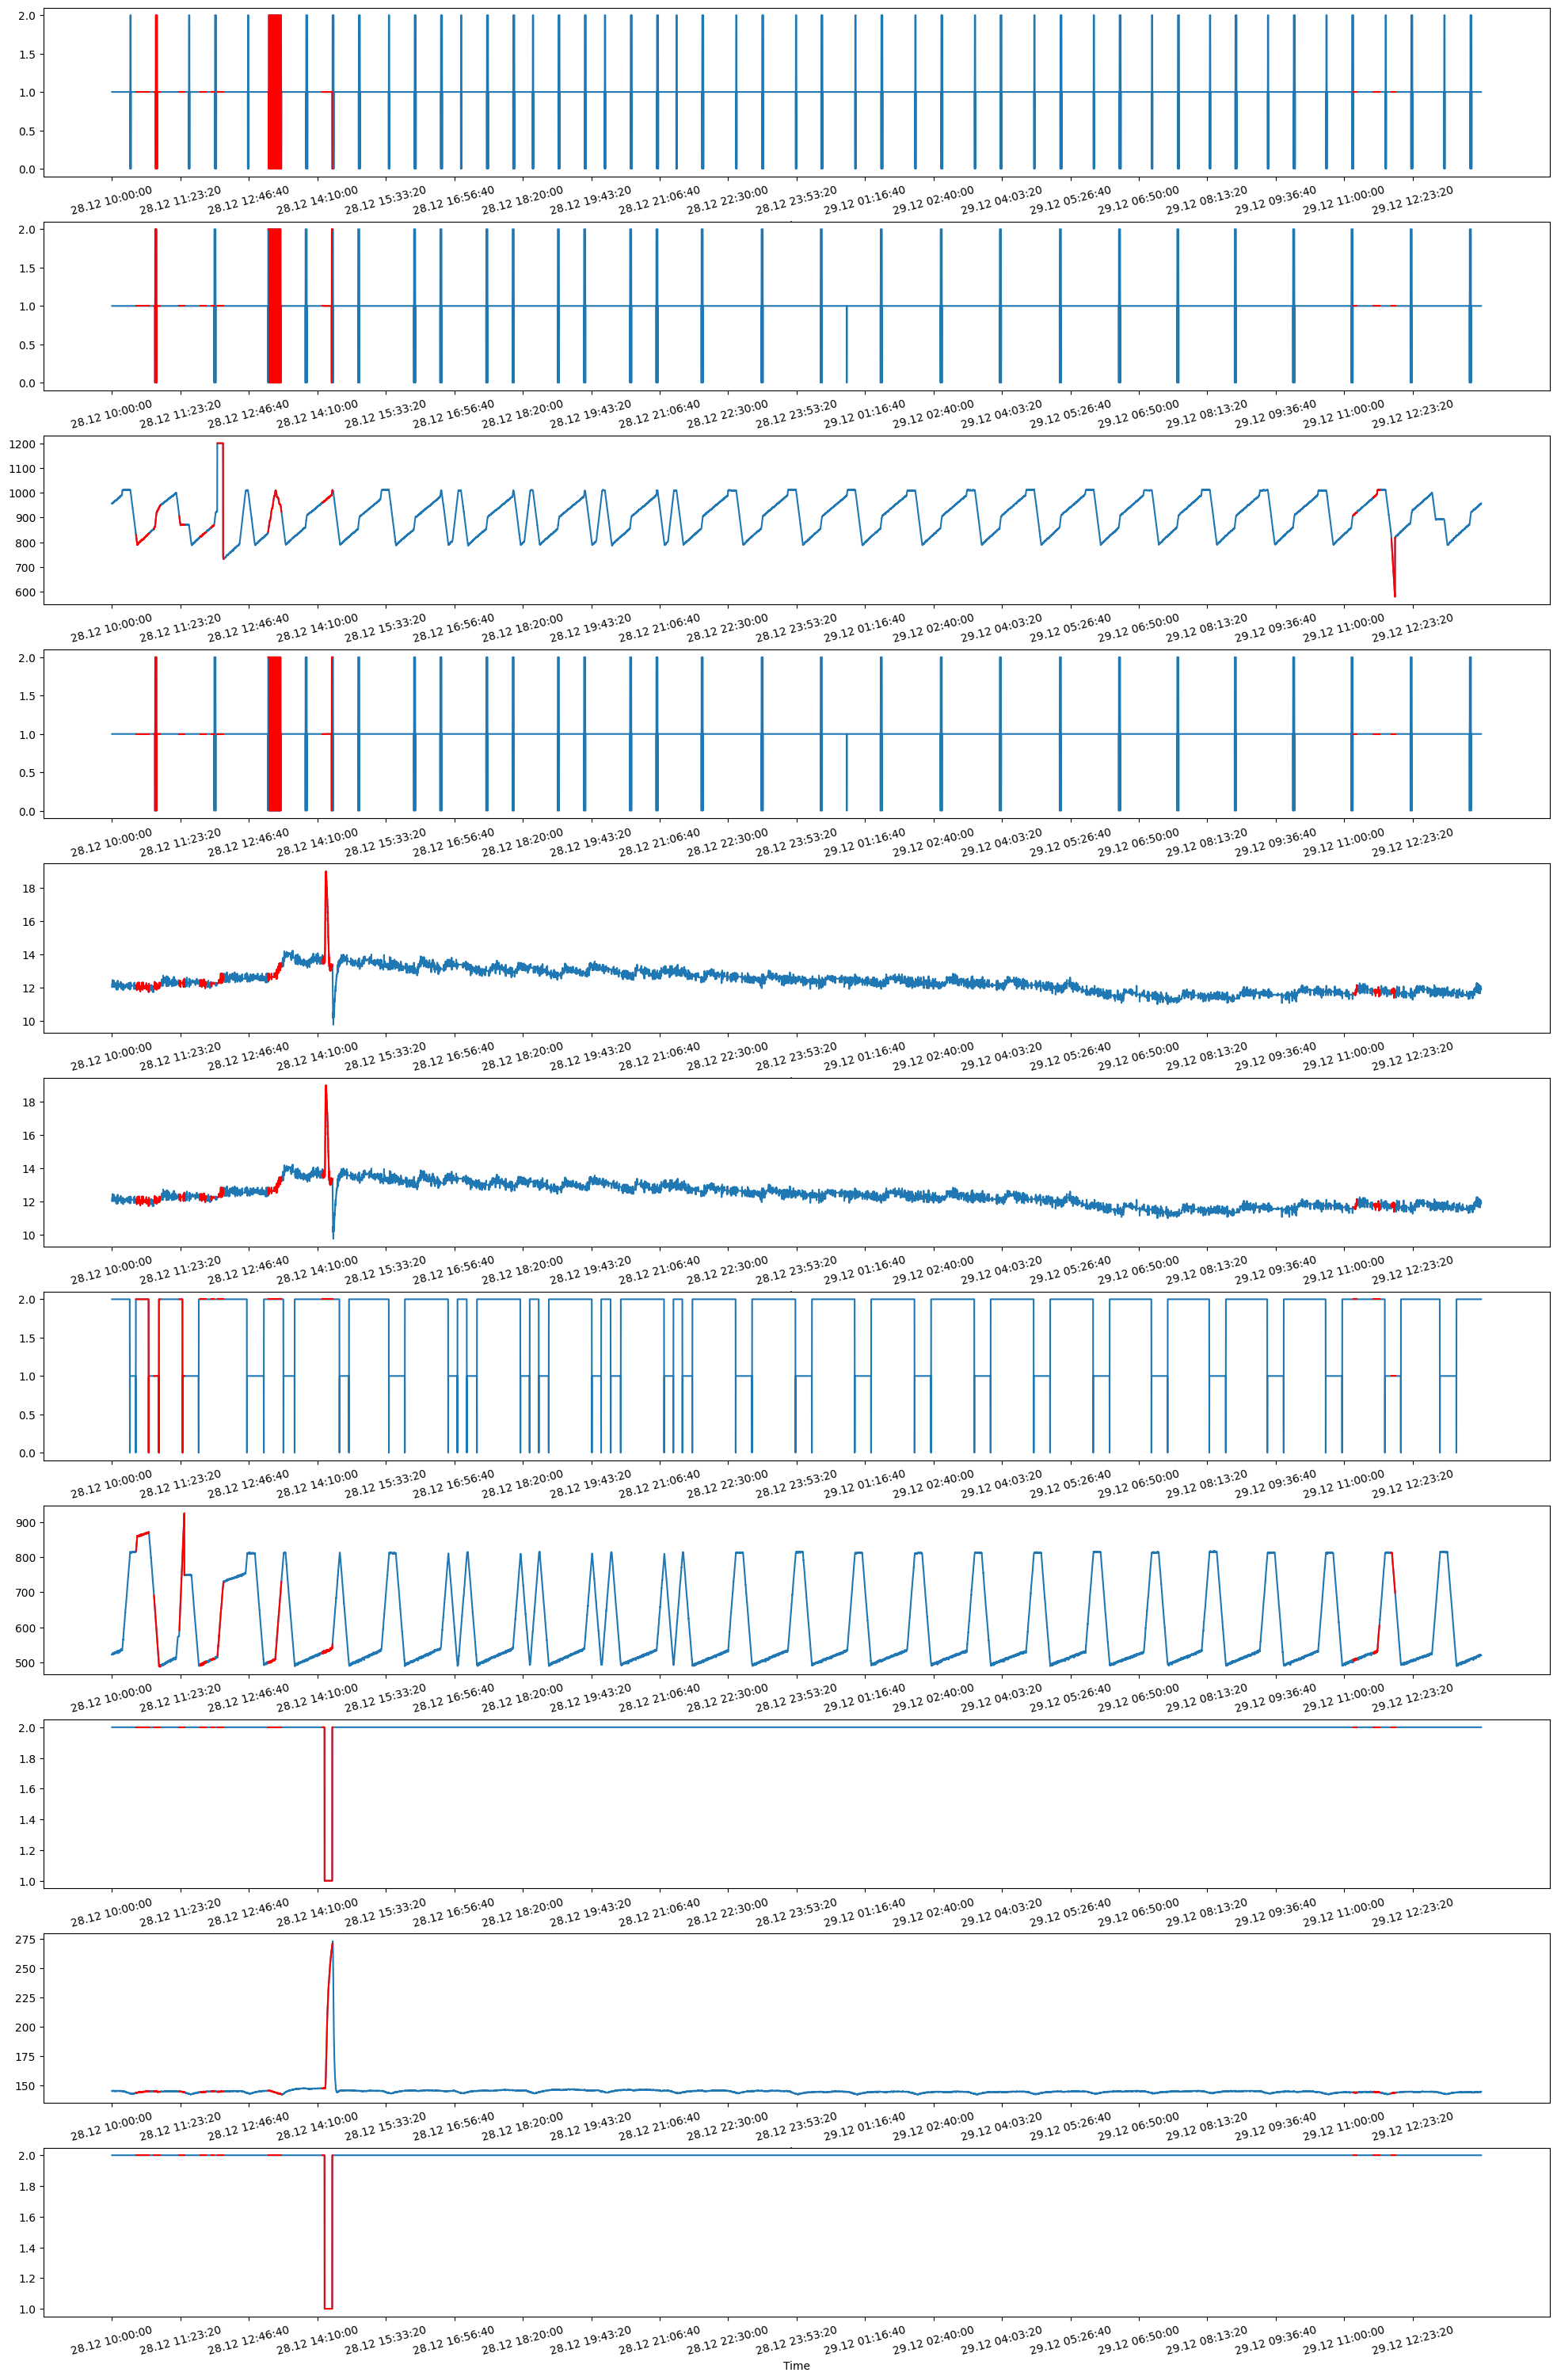

In [57]:
fig, axs = plt.subplots(len(anomaly_feature), 1, figsize=(20, 30))
fig.tight_layout(pad=2)
ind_start, ind_end = 0, 100000
ind = [5000 * i for i in range(0, (ind_end - ind_start) // 5000)]
for i, feature in enumerate(anomaly_feature):
        axs[i].plot(range(ind_end - ind_start), attacks[feature].iloc[ind_start:ind_end], label=feature)
        axs[i].set_xticks(ind, pd.to_datetime(attacks.iloc[ind,:]['Timestamp'], dayfirst=True).dt.strftime('%d.%m %H:%M:%S'), rotation=15)


        for row in attacks_list.values:
                a_ind_st, a_ind_end = row[-2], row[-1]
                if ind_start <= a_ind_st <= a_ind_end <= ind_end:
                       axs[i].plot(np.arange(a_ind_st, a_ind_end), attacks[feature].iloc[a_ind_st:a_ind_end], color='red') 

        axs[i].set_xlabel('Time')
        axs[i]



Test - val split

In [83]:
def search_ratio(test_labels, val_len):
    test = test_labels[val_len:]
    val = test_labels[:val_len]
    test_ratio = (np.sum(test) /test.shape[0]) * 100
    val_ratio = (np.sum(val) / val.shape[0]) * 100
    print(f'val ratio: {val_ratio}')
    print(f'test ratio: {test_ratio}')
    print('----')
    return val_ratio, test_ratio

In [84]:
search_ratio(test_labels=np.array(labels), val_len=int(0.09 * len(labels)))

val ratio: 11.029339128716783
test ratio: 12.250047016928537
----


(11.029339128716783, 12.250047016928537)

In [87]:
attacks.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
1,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
2,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
3,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
4,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
5,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1


Drop redundant columns

In [86]:
attacks.drop(columns=['Timestamp', 'Normal/Attack'], inplace=True)
# normal.drop(columns=['Timestamp', 'Normal/Attack'], inplace=True)

### Split Data

In [89]:
val_len=int(0.09 * len(labels))
validation = attacks[:val_len]
validation_labels = labels[:val_len]

test = attacks[val_len:]
test_labels = labels[val_len:]

validation.shape, test.shape

((40492, 51), (409427, 51))

In [90]:
validation.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
1,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
2,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
3,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
4,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
5,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1


### Normalization

In [91]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(normal)
# scaler = MinMaxScaler().fit(normal)

train_scaled = scaler.transform(normal)
test_scaled = scaler.transform(test)
validation_scaled = scaler.transform(validation)

In [92]:
pd.DataFrame(train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-1.633984,-3.807291,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.644775,-17.91219,0.0,-17.843131,-5.7965,-17.672513,-0.095148,0.0,-0.089482,0.0
1,-1.633984,-3.806646,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.644775,-17.91219,0.0,-17.843131,-5.7965,-17.672513,-0.095148,0.0,-0.089482,0.0
2,-1.633984,-3.806001,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.644775,-17.91219,0.0,-17.843131,-5.7965,-17.672513,-0.095148,0.0,-0.089482,0.0
3,-1.633984,-3.804387,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.644775,-17.91219,0.0,-17.843131,-5.7965,-17.672513,-0.095148,0.0,-0.089482,0.0
4,-1.633984,-3.805678,-1.574619,-1.728131,0.0,-2.477683,-0.828035,-0.719672,-1.731442,-1.684036,...,-17.644775,-17.91219,0.0,-17.843131,-5.7965,-17.672513,-0.095148,0.0,-0.089482,0.0


### Save processed data

In [93]:
np.array(test_labels)

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
np.save('labels_test.npy', np.array(test_labels))
np.save('labels_validation.npy', np.array(validation_labels))
np.save('train_norm.npy', train_scaled)
np.save('test_norm.npy', test_scaled)
np.save('validation_norm.npy', validation_scaled)

In [96]:
# np.load('train.npy')

# AE

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataloader import SwatDataset
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

import pickle
import os
import torch
import pandas as pd
from tqdm import tqdm
from torch.utils.data import TensorDataset

# from pprint import pprint
import wandb

import matplotlib.pyplot as plt

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [4]:
col_list = [1, 2, 3, 4, 6, 12, 14, 16, 18, 21, 22, 24, 27, 28, 29, 33, 35, 42, 49]
train_dataset = SwatDataset("./data/train_norm.npy", feature_idx=col_list, start_idx=10_000, end_idx=-1,
                             window_size=100, sliding=7)
val_dataset = SwatDataset("./data/validation_norm.npy", feature_idx=col_list, start_idx=0, end_idx=-1,
                             window_size=100, sliding=100, labels_path="./data/labels_validation.npy")
test_dataset = SwatDataset("./data/test_norm.npy", feature_idx=col_list, start_idx=0, end_idx=-1,
                             window_size=100, sliding=100, labels_path='./data/labels_test.npy')

len(train_dataset), len(val_dataset), len(test_dataset)


(69270, 402, 4092)

In [4]:
# col_list = [1, 2, 3, 4, 6, 12, 14, 16, 18, 21, 22, 24, 27, 28, 29, 33, 35, 42, 49]

col_list = list(range(51))
train_dataset_minmax = SwatDataset("./data/train.npy", feature_idx=col_list, start_idx=10_000, end_idx=-1,
                             window_size=100, sliding=7)
val_dataset_minmax = SwatDataset("./data/validation.npy", feature_idx=col_list, start_idx=0, end_idx=-1,
                             window_size=100, sliding=100, labels_path="./data/labels_validation.npy")
test_dataset_minmax = SwatDataset("./data/test.npy", feature_idx=col_list, start_idx=0, end_idx=-1,
                             window_size=100, sliding=100, labels_path='./data/labels_test.npy')

len(train_dataset_minmax), len(val_dataset_minmax), len(test_dataset_minmax)

(69270, 402, 4092)

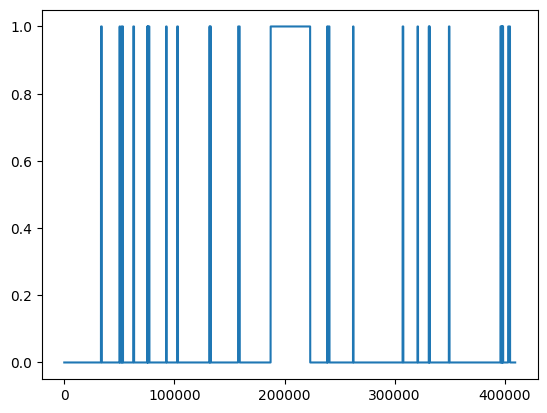

In [6]:
plt.plot(test_dataset.labels)

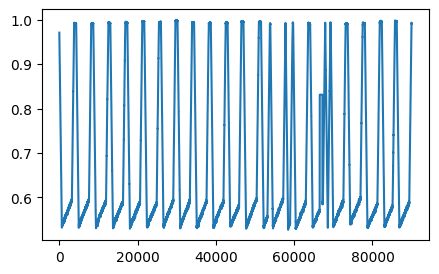

In [7]:
train_clear = np.load("./data/test.npy", allow_pickle=True).take(col_list, axis=1)
train_clear.shape

fig, axs = plt.subplots(1, 1, figsize =(5, 3)) 
axs.plot(train_clear[10_000:100_000, 0])

In [8]:
torch.mean(train_dataset[0][0], dim=0)

tensor([-1.8796,  0.6106,  0.5787,  0.0000, -0.0430,  0.5816, -1.3981,  0.4179,
         0.3252, -0.1192, -0.1264,  0.4634, -0.0801, -1.5865,  0.0000,  0.0544,
         2.4187,  0.0558, -0.0895])

In [9]:
# from sklearn.model_selection import train_test_split

# train, val = train_test_split(train_dataset, test_size=0.1)

# len(train), len(val)

In [5]:
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_loader = DataLoader(train_dataset_minmax, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset_minmax, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset_minmax, batch_size=64, shuffle=False)

# val_train_loader = DataLoader(val, batch_size=64, shuffle=False, num_workers=4)
len(train_loader), len(val_loader), len(test_loader)

(1083, 7, 64)

In [6]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: a-gruzitski. Use `wandb login --relogin` to force relogin


True

In [7]:
LEARNING_RATE = 1e-3
WEIGHT_DECAY= 0
WINDOW_SIZE = 100
NUM_EPOCHS = 20

run = wandb.init(
    project="anomaly-detection_5",
    config={
        "model": "Bottleneck scaling",
        "learning_rate": LEARNING_RATE,
        "epochs": NUM_EPOCHS,
        # "label": "aaa",
        "window_size": WINDOW_SIZE,
        "weight_decay": WEIGHT_DECAY,
        # "optimizer": "SGD",
        "optimizer": "Adam",
        "scheduler" : "transf_warmup",
        "feat_num": "all"
    },
);


In [8]:
from models import TransformerBasicBottleneckScaling, TransformerBasicv2, TransformerBasicBottleneckScalingNoAct
from models import TransformerBasicBottleneck
from torch.optim import Adam, SGD
from training import train

from transformers import get_linear_schedule_with_warmup

# model = TransformerBasicBottleneck(feats=len(col_list), window_size=200).to(device)
criterion = torch.nn.MSELoss()  # mean reduction
 
model = TransformerBasicBottleneckScaling(feats=len(col_list), 
                                          window_size=100,
                                          ).to(device)
# model = TransformerBasicBottleneckScalingNoAct(feats=len(col_list), 
#                                           window_size=100,
#                                           ).to(device)

for p in model.parameters():
    if p.dim() > 1:
        torch.nn.init.xavier_uniform_(p)

# LEARNING_RATE = 1e-9
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

   
# optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
# scheduler = None

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-4, steps_per_epoch=2, epochs=NUM_EPOCHS)

scheduler = get_linear_schedule_with_warmup(optimizer, 0.1*NUM_EPOCHS, NUM_EPOCHS)
# lambda1 = lambda epoch: 0.7 ** epoch
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

c:\Users\Andrew23\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [50]:
# model =  TransformerBasicBottleneckScaling(feats=len(col_list),  window_size=100).to(device)
# model.load_state_dict(torch.load(".\checkpoints\TransformerBasicBottleneckScaling16e_AdamTransfSheduler.pt"))

<All keys matched successfully>

In [10]:
train_losses, test_losses, train_accuracies, test_accuracies = train(
    model, optimizer, scheduler, criterion, train_loader, val_loader, NUM_EPOCHS,
    device, start_epoch=1,
    save_checkpoints=True,
    val_labels_path="./data/labels_validation.npy",
)

Training 1/20:   0%|          | 0/1083 [00:00<?, ?it/s]

In [90]:
torch.save(model.state_dict(), 'checkpoints/AE_BSminmax_20e_adam_TransSheduler.pt')

In [73]:
# train_losses, test_losses, train_accuracies, test_accuracies = train(
#     model, optimizer, scheduler, criterion, train_loader, val_loader, 20,
#     device
# )

### Evaluate

In [83]:
test_clear = np.load("./data/test.npy", allow_pickle=True).take(col_list, axis=1)
val_clear = np.load("./data/validation.npy", allow_pickle=True).take(col_list, axis=1)
print(test_clear.shape, val_clear.shape)

# fig, axs = plt.subplots(1, 1, figsize =(10, 3)) 
# axs.plot(test_clear[:, 5])

(409427, 19) (40492, 19)


In [84]:
from models import TransformerBasicBottleneckScaling, TransformerBasicv2, TransformerBasicBottleneckScalingNoAct

model_l =  TransformerBasicBottleneckScaling(feats=len(col_list),  window_size=100).to(device)
model_l.load_state_dict(torch.load("checkpoints\TransformerBasicBottleneckScaling4e_AdamTransfSheduler.pt"))

<All keys matched successfully>

In [85]:
# for feat, labels in test_loader:
#     feat = feat.to(device)
#     labels = torch.Tensor(labels)
#     labels = labels.to(device)  # labels: batch_size * window
    
#     pred = model(feat, feat).detach().cpu().numpy()
#     print(pred)
#     break

# results[5000:7000, 0]

### TEST

data is ready!


c:\university\course_work\training.py:244: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  # axs[2*i+1].set_ylim([input[:, i].min() - 0.5, input[:, i].max() + 0.5])


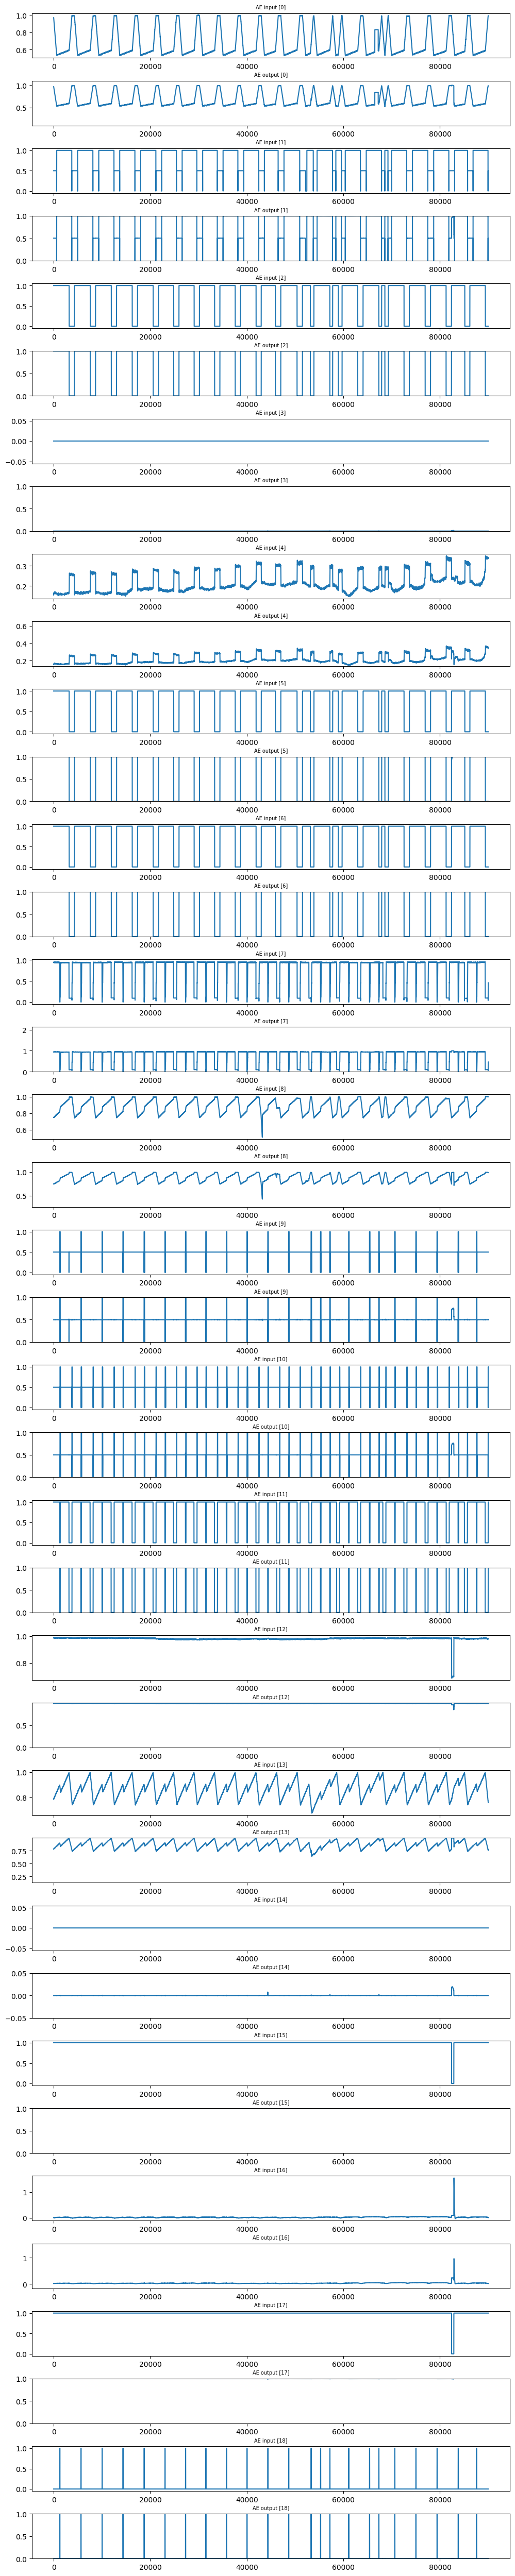

In [97]:
from training import plot_output

plot_output(model, test_loader, device=device, param_dim=19, max_plots=19)

In [106]:
import metrics_eval
from training import validation_epoch

test_labels = np.load("./data/labels_test.npy")

_, _, full_test_loss, _ = validation_epoch(model, criterion, test_loader,
                      "getting full loss", 0, device=device)

loss_w = full_test_loss.mean(axis=2)
loss_w = loss_w.reshape(-1)

# metrics_eval.evaluate(loss_w, test_labels, validation_thresh=None)

test_res = metrics_eval.evaluate(loss_w, test_labels, validation_thresh=0.032681314945220946)
test_res

getting full loss:   0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 50/50 [11:49<00:00, 14.20s/it]


{'f1': 0.8792563957570206,
 'ROC/AUC': 0.9103289727064388,
 'f1_max': 0.8889547780632975,
 'preds': array([False, False, False, ..., False, False, False]),
 'k': 0,
 'thresh_max': 0.032681314945220946,
 'roc_max': 0.9103289727064388}

In [110]:
len(test_res["preds"]), test_res["preds"].sum()

(409200, 40907)

In [105]:
np.isnan(loss_w).sum()

0

### TRAIN

In [68]:
start=200_000
end=300_000
train_dataset_val = SwatDataset("./data/train.npy", feature_idx=col_list, start_idx=start, end_idx=end,
                             window_size=100, sliding=100)

train_loader_val = DataLoader(train_dataset_val, batch_size=64, shuffle=False, num_workers=4)

train_clear = np.load("./data/train.npy", allow_pickle=True).take(col_list, axis=1)
print(train_clear[start:end, :].shape, len(train_dataset_val))

(100000, 19) 998


data is ready!


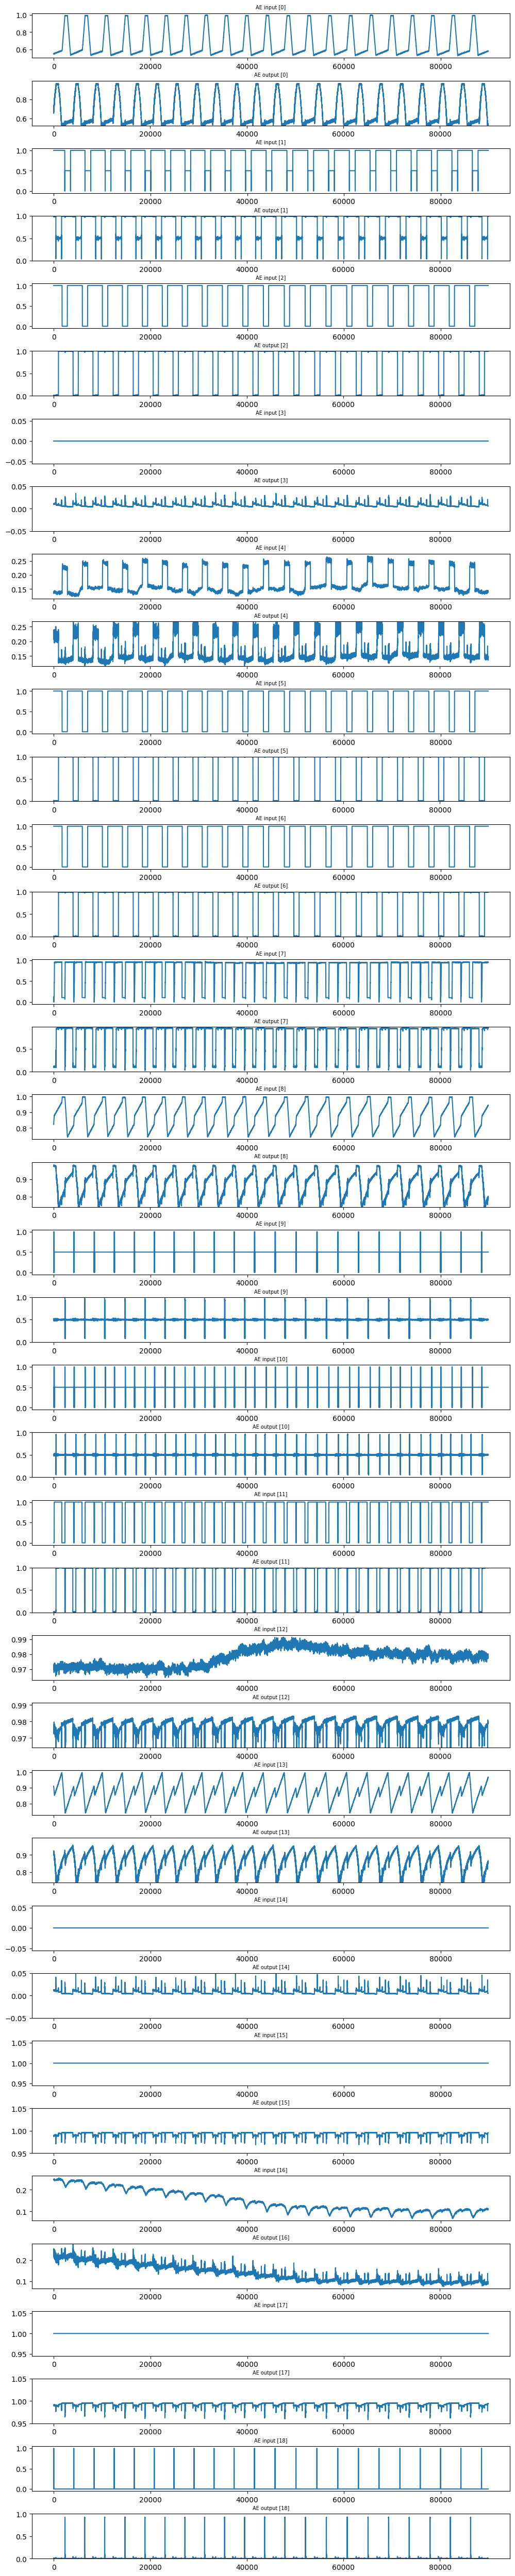

In [69]:
plot_output(model_l, train_loader_val, device=device, output=None, param_dim=19, max_plots=19, input=None)  # train_clear[start:end, :]

In [98]:
# fig.savefig('some_output')

In [ ]:
len(train_dataset_val)